# Investigate relaxation runs sea ice concentration patterns

In [20]:
import cccmautils as cutl
import constants as con
import pandas as pd
import numpy.ma as ma
import scipy.io as sio
import matplotlib.lines as mlines
import rlx_utils as rutl

import loadCanESM2rlxdata as lrlx

%matplotlib inline

cutl = reload(cutl)

domonth=False
sea='SO' 
mo=1 # mo is 1-based
last='last200' # else 'last100', 'first100'
includeyr1=False # only used when first100

suff = last+'yr'
if domonth:
    seasonalizedt={'mo':mo}
else:
    seasonalizedt={'season':sea}

if last=='last200': fldsfx='NH'

zconv = 1/con.get_g()


casenames = ('preipreiice', 'prei2xco2iceb','2xco22xco2ice','2xco2preiice')#'pi2xco2ipulse',
shortnames = {'preipreiice': 'C$_{PI}$I$_{PI}$',
             'prei2xco2iceb': 'C$_{PI}$I$_{2X}$',
             '2xco22xco2ice': 'C$_{2X}$I$_{2X}$',
             '2xco2preiice': 'C$_{2X}$I$_{PI}$',
             'gregory_2xco2':'doubleCO$_2$',
             'iga':'piControl'} #'pi2xco2ipulse': '1C_2Ipulse',

colors = {'preipreiice': 'k', 'prei2xco2iceb': 'b', 
            'pi2xco2ipulse': 'cyan', '2xco22xco2ice': 'r',
            '2xco2preiice': 'pink',
         'Sum':'purple','Full':'black','ICEcold':'blue','CO2hi':'red',
         'gregory_2xco2':'magenta','iga':'0.5'}

verb=True

lat,lon = lrlx.load_nclatlon('st'+fldsfx,last=last,includeyr1=includeyr1,verb=verb)


/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)


## load lat x lon data

In [2]:
lrlx=reload(lrlx)

ncsicdt, ncsiczmdt = lrlx.load_ncfield('sicn'+fldsfx,'SICN',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,conv=100,**seasonalizedt)

if last=='last200': # area averaged
#    nctmpgmdt, nctmpgmzmdt = lrlx.load_ncfield('stgm','ST', zonal=False,
#                                      last=last,includeyr1=includeyr1,
#                                      verb=verb,**seasonalizedt) 
    ncsianhdt, ncsianhzmdt = lrlx.load_ncfield('sianh','sianh', zonal=False,
                                          last=last,includeyr1=includeyr1,
                                          verb=verb,**seasonalizedt) 


/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (200, 32, 129)
fldzm.shape: (200, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_sicnNH_3022-3221_ts.nc


/Users/kelly/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3919: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__ne__(other)


/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_sicnNH_3022-3221_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (200, 32, 129)
fldzm.shape: (200, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts/2xco22xco2ice_sicnNH_2452-2651_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts/2xco22xco2ice_sicnNH_2452-2651_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (200, 32, 129)
fldzm.shape: (200, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco2preiice/ts/2xco2preiice_sicnNH_2552-2751_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco2preiice/ts/2xco2preiice_sicnNH_2552-2751_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (200, 32, 

## load monthly data

In [3]:
ncsicmodt, ncsicmozmdt = lrlx.load_ncfield('sicn'+fldsfx,'SICN',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,conv=100)
# Add SIT so can plot sea cycle of volume for paper revisions
deni = 913. # density of ice
# gives thickness IN GRID CELL (not actual thickness of ice)
ncsitmodt, _ = lrlx.load_ncfield('sic'+fldsfx,'SIC',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,conv=deni) 

ncsivmodt, _ = lrlx.load_ncfield('sivnh','sivnh',zonal=False,
                                 last=last,includeyr1=includeyr1,
                                 verb=verb,conv=1) 

if last=='last200': # 1D data
    ncsianhmodt, ncsianhmozmdt = lrlx.load_ncfield('sianh','sianh',zonal=False,
                                       last=last,includeyr1=includeyr1,
                                       verb=verb)


/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_sicnNH_3022-3221_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_sicnNH_3022-3221_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_sicnNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts/2xco22xco2ice_sicnNH_2452-2651_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2x

(2400,)
(200,)
(2400,)
nyr, otherdims, oshape 200 () ()
remclimo.shape (12,)
tshape (200,)
(2400,)
nyr, otherdims, oshape 200 () ()
remclimo.shape (12,)
tshape (200,)
(200,)
nyrs,remainder 199 1
nyrs 199
ret.shape (199,)
nyrs 199, and 199
nyrs,remainder 199 1
nyrs 199
ret.shape (199,)
nyrs 199, and 199


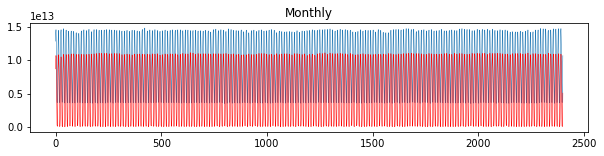

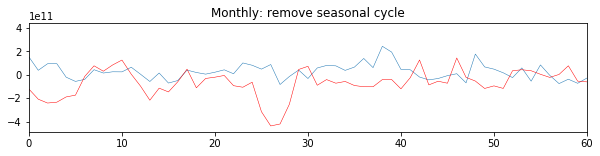

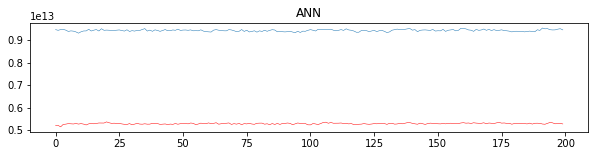

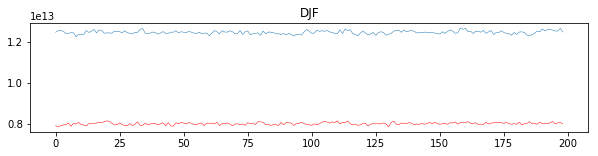

In [45]:
cutl=reload(cutl)

print ncsianhmodt['preipreiice'].shape
print ncsianhdt['preipreiice'].shape
ncsianhtmdt={}

ncsianhtmdt['preipreiice'] = cutl.rem_seasonalcycle(ncsianhmodt['preipreiice'])
ncsianhtmdt['2xco22xco2ice'] = cutl.rem_seasonalcycle(ncsianhmodt['2xco22xco2ice'])

cocomo=ncsianhmodt['2xco22xco2ice']
pipimo=ncsianhmodt['preipreiice']
plt.figure(figsize=(10,2))
plt.plot(pipimo,linewidth=.5)
plt.plot(cocomo,linewidth=.5,color='r')
plt.title('Monthly')


plt.figure(figsize=(10,2))
plt.plot(ncsianhtmdt['preipreiice'],linewidth=.5)
plt.plot(ncsianhtmdt['2xco22xco2ice'],linewidth=.5,color='r')
plt.title('Monthly: remove seasonal cycle')
plt.xlim((0,60))

pipiann = cutl.annualize_monthlyts(pipimo)
cocoann = cutl.annualize_monthlyts(cocomo)
print pipiann.shape
plt.figure(figsize=(10,2))
plt.plot(pipiann,linewidth=.5)
plt.plot(cocoann,linewidth=.5,color='r')
plt.title('ANN')

pipits = cutl.selectmonths(pipimo,retavg=True) # DJF avg timeseries
cocots = cutl.selectmonths(cocomo,retavg=True) # DJF avg timeseries
plt.figure(figsize=(10,2))
plt.plot(pipits,linewidth=.5)
plt.plot(cocots,linewidth=.5,color='r')
plt.title('DJF')

SO


/Users/kelly/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kelly/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kelly/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/kelly/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/kelly/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/kelly/

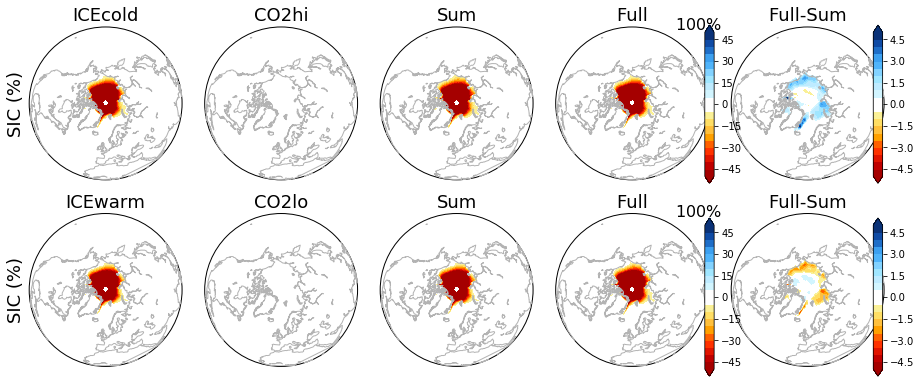

In [19]:
# Investigate SIC patterns b/w SUM and FULL

printtofile=False

print sea

rutl=reload(rutl)

if sea in ('DJF',):
    cmin=-20; cmax=20
    cmin2=cmin; cmax2=cmax
    cmind=-10; cmaxd=10
elif sea in ('JJA',):
    cmin=-50; cmax=50
    cmin2=cmin; cmax2=cmax
    cmind=-5; cmaxd=5
else:
    cmin=-50; cmax=50
    cmin2=cmin; cmax2=cmax
    cmind=-5; cmaxd=5
    
addsig=False
sigtype=None
fsz=18
cmap='red2blue_w20'
northof=60


cby1=0.515; cby2=.028;  
cbx2=0.775; cbx3=0.955
cbw=0.01; cbh=0.4


pparamssic = {'cmin':cmin, 'cmax':cmax, 'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz,'cmap':cmap,'northof':northof}

fig,axs=plt.subplots(2,5,figsize=(13,5.5))

ph,ph2, phd= rutl.plot_nc_linearity_maps(ncsicdt,axs[0,:],lin='one',nolin=False,**pparamssic)
cplt.add_colorbar(fig,ph2,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,phd,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('SIC (%)',fontsize=fsz)

ph,ph2,phd = rutl.plot_nc_linearity_maps(ncsicdt,axs[1,:],lin='two',
                                nolin=False,suppttl=False,**pparamssic)
cplt.add_colorbar(fig,ph2,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,phd,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('SIC (%)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    fig.savefig('sic_pattcorrnorthof' + str(northof) + '_maps_' + sea + '_nh3_' + suff +'.pdf',
                bbox_inches='tight')

 


In [4]:
# seasonal cycle of SIA and SIV




siaseacyc={}
sicseacyc={}; sitseacyc={}; sivseacyc={}
for casename in casenames:
    siaseacyc[casename],_ = cutl.climatologize(ncsianhmodt[casename])
    sicseacyc[casename],_ = cutl.climatologize(ncsicmodt[casename])
    sitseacyc[casename],_ = cutl.climatologize(ncsitmodt[casename])
    sivseacyc[casename],_ = cutl.climatologize(ncsivmodt[casename])


siadiffs=rutl.rlx_diffs(siaseacyc,dotimmean=False)
siadiffs['Sum'] = siadiffs['ICEcold']+siadiffs['CO2hi']
sitdiffs=rutl.rlx_diffs(sitseacyc,dotimmean=False)
sitdiffs['Sum'] = sitdiffs['ICEcold']+sitdiffs['CO2hi']
sicdiffs=rutl.rlx_diffs(sicseacyc,dotimmean=False)
sicdiffs['Sum'] = sicdiffs['ICEcold']+sicdiffs['CO2hi']
sivdiffs=rutl.rlx_diffs(sivseacyc,dotimmean=False)
sivdiffs['Sum'] = sivdiffs['ICEcold']+sivdiffs['CO2hi']


print siadiffs.keys()


    
    
    
    
#siadiffs['SUM'] = siaseacyc['prei2xco2iceb']-siaseacyc['preipreiice'] + \
#        siaseacyc['2xco2preiice']-siaseacyc['preipreiice']
#siadiffs['FULL'] = siaseacyc['2xco22xco2ice']-siaseacyc['preipreiice']
#siadiffs['ICEcold']=siaseacyc['prei2xco2iceb']-siaseacyc['preipreiice']
#siadiffs['CO2hi']=siaseacyc['2xco2preiice']-siaseacyc['preipreiice']
    

['Full', 'ICEwarm', 'Sum', 'ICEcold', 'CO2lo', 'CO2hi']


In [15]:
# get unconstrained runs (the nudging targets) for reference
DataRoot = '/Users/kelly/DATA/DataDisk/'
years = {'gregory_2xco2':'2451-2550','iga':'2921-3020'}

unsiadt={}; unsivdt={}
for cs in years.keys():
    field='sianh'
    filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_seacycle.nc'
    print filename
    unsiadt[cs] = cnc.getNCvar(filename,field)
    
    field='sivnh'
    filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_seacycle.nc'
    print filename
    unsivdt[cs] = cnc.getNCvar(filename,field)

siaseacyc['gregory_2xco2'] = unsiadt['gregory_2xco2']
siaseacyc['iga'] = unsiadt['iga']
sivseacyc['gregory_2xco2'] = unsivdt['gregory_2xco2']
sivseacyc['iga'] = unsivdt['iga']


/Users/kelly/DATA/DataDisk/gregory_2xco2/gregory_2xco2_sianh_2451-2550_seacycle.nc
/Users/kelly/DATA/DataDisk/gregory_2xco2/gregory_2xco2_sivnh_2451-2550_seacycle.nc
/Users/kelly/DATA/DataDisk/iga/iga_sianh_2921-3020_seacycle.nc
/Users/kelly/DATA/DataDisk/iga/iga_sivnh_2921-3020_seacycle.nc


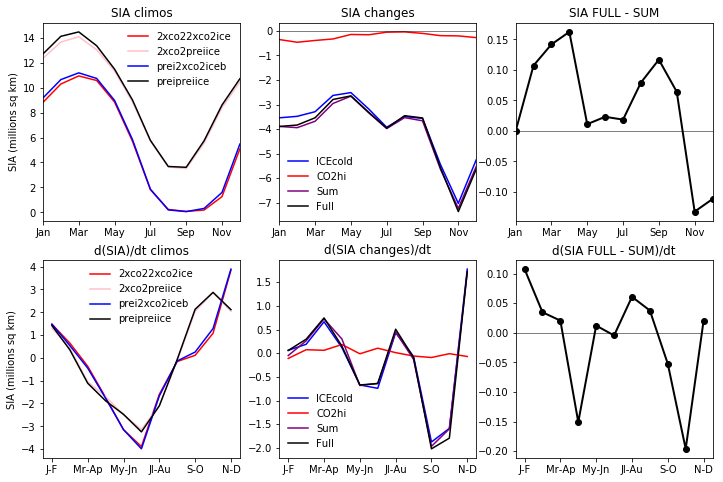

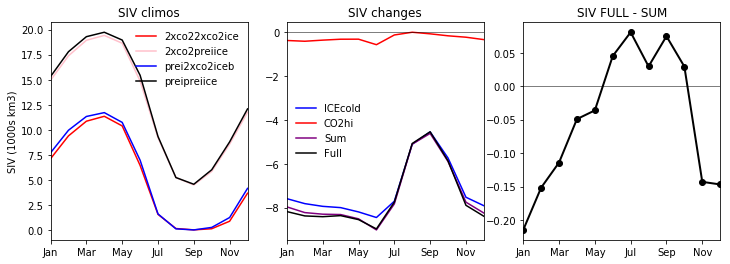

In [35]:
printtofile=False

subkeys=('ICEcold','CO2hi','Sum','Full')

fig,axs = plt.subplots(2,3,figsize=(12,8))
ax=axs[0,0]
for key in siaseacyc.keys():
    ax.plot(siaseacyc[key]/1e12,color=colors[key])
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.legend(siaseacyc.keys(),frameon=False,loc='best')
ax.set_title('SIA climos')
ax.set_ylabel('SIA (millions sq km)')

ax=axs[0,1]
for key in subkeys:
    ax.plot(siadiffs[key]/1e12,color=colors[key])
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.legend(subkeys,frameon=False,loc='best')
ax.axhline(y=0,color='k',linewidth=0.5)
ax.set_title('SIA changes')

ax=axs[0,2]
ax.plot((siadiffs['Full'] - siadiffs['Sum'])/1e12,color='black',
        linewidth=2,marker='o')
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.axhline(y=0,color='k',linewidth=0.5)
ax.set_title('SIA FULL - SUM')


ax=axs[1,0]
for key in siaseacyc.keys():
    ax.plot(np.diff(siaseacyc[key])/1e12,color=colors[key])
#ax.set_xlim((0,11))
ax.set_xticks(np.arange(0,11,2))
ax.set_xticklabels(('J-F','Mr-Ap','My-Jn','Jl-Au','S-O','N-D'))
ax.legend(siaseacyc.keys(),frameon=False,loc='best')
ax.set_title('d(SIA)/dt climos')
ax.set_ylabel('SIA (millions sq km)')

ax=axs[1,1]
for key in subkeys:
    ax.plot(np.diff(siadiffs[key]/1e12),color=colors[key])
#ax.set_xlim((0,11))
ax.set_xticks(np.arange(0,11,2))
ax.set_xticklabels(('J-F','Mr-Ap','My-Jn','Jl-Au','S-O','N-D'))
ax.legend(subkeys,frameon=False,loc='best')
ax.set_title('d(SIA changes)/dt')

ax=axs[1,2]
ax.plot((np.diff(siadiffs['Full']) - np.diff(siadiffs['Sum']))/1e12,color='black',
        linewidth=2,marker='o')
#ax.set_xlim((0,11))
ax.set_xticks(np.arange(0,11,2))
ax.set_xticklabels(('J-F','Mr-Ap','My-Jn','Jl-Au','S-O','N-D'))
ax.axhline(y=0,color='k',linewidth=0.5)
ax.set_title('d(SIA FULL - SUM)/dt')

if printtofile:
    fig.savefig('sianh_seacycle_changes_full-sum_deriv2.pdf')
    
    
divby=1e12

# SEA ICE VOLUME
fig,axs = plt.subplots(1,3,figsize=(12,4))
ax=axs[0]
for key in sivseacyc.keys():
    ax.plot(sivseacyc[key]/divby,color=colors[key])
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.legend(sivseacyc.keys(),frameon=False,loc='best')
ax.set_title('SIV climos')
ax.set_ylabel('SIV (1000''s km3)')

ax=axs[1]
for key in subkeys:
    ax.plot(sivdiffs[key]/divby,color=colors[key])
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.legend(subkeys,frameon=False,loc='best')
ax.axhline(y=0,color='k',linewidth=0.5)
ax.set_title('SIV changes')

ax=axs[2]
ax.plot((sivdiffs['Full'] - sivdiffs['Sum'])/divby,color='black',
        linewidth=2,marker='o')
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.axhline(y=0,color='k',linewidth=0.5)
ax.set_title('SIV FULL - SUM')

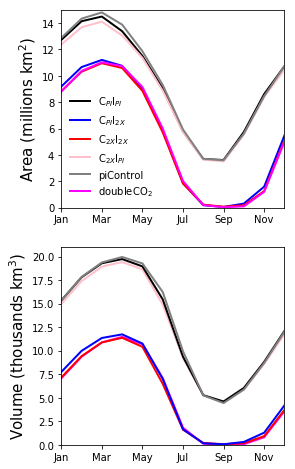

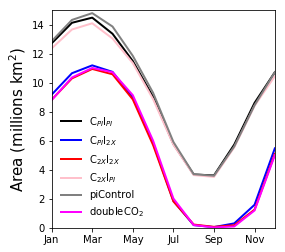

In [23]:
# FIG FOR PAPER SUPP : climos only
#  Should unconstrained runs be added?

fsz=15

printtofile=False

divby=1e12

legstrs=[]
fig,axs = plt.subplots(2,1,figsize=(4,8))
ax=axs[0]
for key in (casenames+('iga','gregory_2xco2')): #siaseacyc.keys():
    ax.plot(siaseacyc[key]/1e12,color=colors[key],linewidth=2)
    legstrs.append(shortnames[key])
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.legend(legstrs,frameon=False,loc='best')
#ax.set_title('Sea ice area (millions km$^2$)',fontsize=fsz)
ax.set_ylabel('Area (millions km$^2$)',fontsize=fsz)
ax.set_ylim((0,15))

ax=axs[1]
for key in sivseacyc.keys():
    ax.plot(sivseacyc[key]/divby,color=colors[key],linewidth=2)
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
#ax.set_title('Sea ice volume (thousands km$^3$)',fontsize=fsz)
ax.set_ylabel('Volume (thousands km$^3$)',fontsize=fsz)
ax.set_ylim((0,21))

if printtofile:
    
    fig.savefig('SIA_SIV_seacycle_climos_withunconstrained.pdf',bbox_inches='tight')

    
# JUST AREA
legstrs=[]
fig,ax = plt.subplots(1,1,figsize=(4,4))
for key in (casenames+('iga','gregory_2xco2')): #siaseacyc.keys():
    ax.plot(siaseacyc[key]/1e12,color=colors[key],linewidth=2)
    legstrs.append(shortnames[key])
ax.set_xlim((0,11))
ax.set_xticklabels(('Jan','Mar','May','Jul','Sep','Nov'))
ax.legend(legstrs,frameon=False,loc='best')
#ax.set_title('Sea ice area (millions km$^2$)',fontsize=fsz)
ax.set_ylabel('Area (millions km$^2$)',fontsize=fsz)
ax.set_ylim((0,15))
if printtofile:
    fig.savefig('SIA_seacycle_climos_withunconstrained.pdf',bbox_inches='tight')



## Seasonal cycles of other variables

In [39]:
lrlx=reload(lrlx)

zconv = 1/con.get_g()

if last=='last200': # seasonal cycles 
    ncstseadt, ncstseazmdt = lrlx.load_ncfield('st','ST',zonal=False,
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,seacyc=True,local=True)
    ncsicseadt, ncsicseazmdt = lrlx.load_ncfield('sicn','SICN',zonal=False,
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,conv=100,seacyc=True,local=True)
    ncslpseadt, ncslpseazmdt = lrlx.load_ncfield('pmsl','PMSL',zonal=False,
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,seacyc=True,local=True)
    ncz500seadt, ncz500seazmdt = lrlx.load_ncfield('gz50000','PHI',zonal=False,
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,seacyc=True,local=True,conv=zconv)
    
    lat64=ncstseadt['lat']
    lon64=ncstseadt['lon']

/Users/kelly/DATA/DataDisk/preipreiice_st_2922-3121_seacycle.nc
/Users/kelly/DATA/DataDisk/preipreiice_st_2922-3121_seacycle.nc, fld.shape (12, 64, 129)
fld.shape: (12, 64, 129)
/Users/kelly/DATA/DataDisk/preipreiice_st_2922-3121_DJF_mean.nc
lat.shape (64,)
lon.shape (129,)
No lev coord. Leave it
/Users/kelly/DATA/DataDisk/prei2xco2iceb_st_3022-3221_seacycle.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb_st_3022-3221_seacycle.nc, fld.shape (12, 64, 129)
fld.shape: (12, 64, 129)
/Users/kelly/DATA/DataDisk/preipreiice_st_2922-3121_DJF_mean.nc
lat.shape (64,)
lon.shape (129,)
No lev coord. Leave it
/Users/kelly/DATA/DataDisk/2xco22xco2ice_st_2452-2651_seacycle.nc
/Users/kelly/DATA/DataDisk/2xco22xco2ice_st_2452-2651_seacycle.nc, fld.shape (12, 64, 129)
fld.shape: (12, 64, 129)
/Users/kelly/DATA/DataDisk/preipreiice_st_2922-3121_DJF_mean.nc
lat.shape (64,)
lon.shape (129,)
No lev coord. Leave it
/Users/kelly/DATA/DataDisk/2xco2preiice_st_2552-2751_seacycle.nc
/Users/kelly/DATA/DataDisk/2xco2p

In [ ]:
import cccmaplots as cplt

print ncstseadt['preipreiice'].shape

def ncdiffs(ncdt):
    diffdt={}
    diffdt['SUM'] = ncdt['prei2xco2iceb']-ncdt['preipreiice'] + \
        ncdt['2xco2preiice']-ncdt['preipreiice']
    diffdt['FULL'] = ncdt['2xco22xco2ice']-ncdt['preipreiice']
    diffdt['ICEcold']=ncdt['prei2xco2iceb']-ncdt['preipreiice']
    diffdt['CO2hi']=ncdt['2xco2preiice']-ncdt['preipreiice']

    return diffdt

(12, 64, 129)


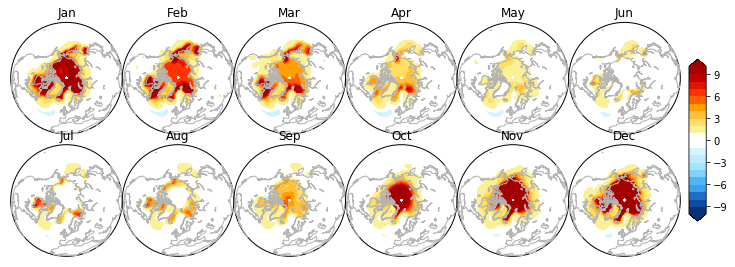

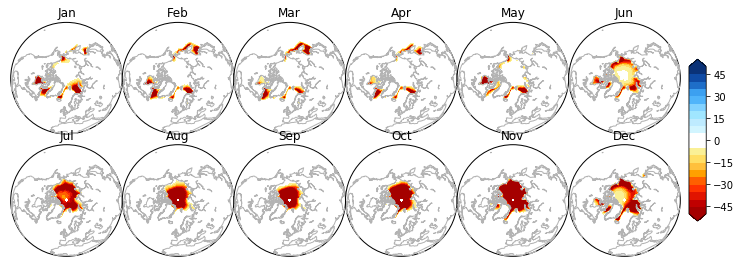

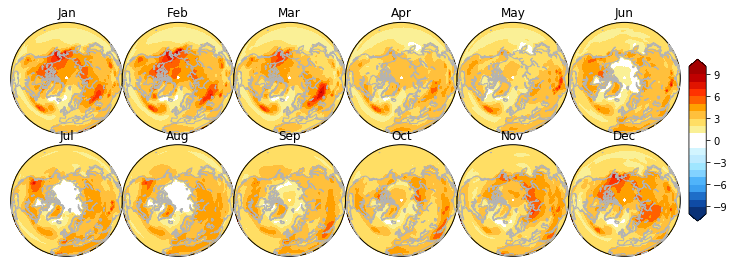

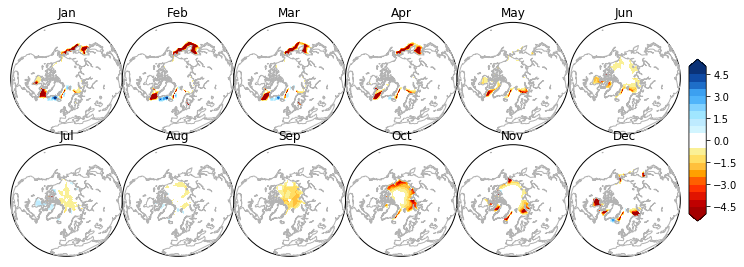

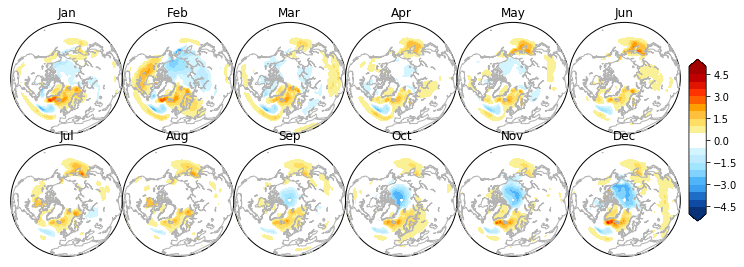

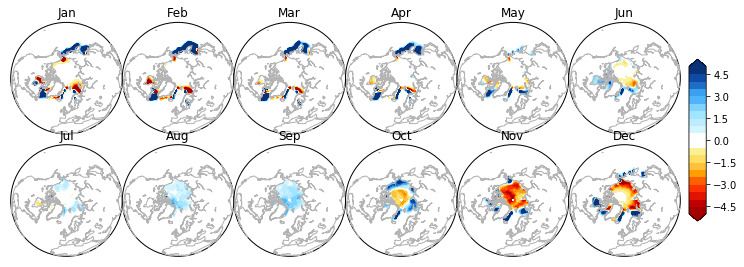

In [36]:
    
stdiffs=ncdiffs(ncstseadt)
sicdiffs=ncdiffs(ncsicseadt)

stpparams = {'ptype':'nh', 'cmap':'blue2red_w20', 'cmin':-10, 'cmax':10}
stdpparams = {'ptype':'nh', 'cmap':'blue2red_w20', 'cmin':-5, 'cmax':5}

sicpparams = {'ptype':'nh', 'cmap':'red2blue_w20', 'cmin':-50, 'cmax':50}
sicdpparams = {'ptype':'nh', 'cmap':'red2blue_w20', 'cmin':-5, 'cmax':5}

#fig,axs=plt.subplots(2,5,figsize=(13,5.5))

fig = cplt.map_allmonths(stdiffs['ICEcold'],lat64,lon64,**stpparams)
fig = cplt.map_allmonths(sicdiffs['ICEcold'],lat64,lon64,**sicpparams)

fig = cplt.map_allmonths(stdiffs['CO2hi'],lat64,lon64,**stpparams)
fig = cplt.map_allmonths(sicdiffs['CO2hi'],lat64,lon64,**sicdpparams)

fig = cplt.map_allmonths(stdiffs['FULL']-stdiffs['SUM'],lat64,lon64,**stdpparams)
fig = cplt.map_allmonths(sicdiffs['FULL']-sicdiffs['SUM'],lat64,lon64,**sicdpparams)

In [ ]:
slpdiffs=ncdiffs(ncslpseadt)
z500diffs=ncdiffs(ncz500seadt)

slppparams = {'ptype':'nh', 'cmap':'blue2red_w20', 'cmin':-10, 'cmax':10}
slpdpparams = {'ptype':'nh', 'cmap':'blue2red_w20', 'cmin':-2, 'cmax':2}

z500pparams = {'ptype':'nh', 'cmap':'blue2red_20', 'cmin':-150, 'cmax':150}
z500dpparams = {'ptype':'nh', 'cmap':'blue2red_20', 'cmin':-50, 'cmax':50}

#fig,axs=plt.subplots(2,5,figsize=(13,5.5))

fig = cplt.map_allmonths(stdiffs['ICEcold'],lat64,lon64,**stpparams)
fig = cplt.map_allmonths(sicdiffs['ICEcold'],lat64,lon64,**sicpparams)

fig = cplt.map_allmonths(stdiffs['CO2hi'],lat64,lon64,**stpparams)
fig = cplt.map_allmonths(sicdiffs['CO2hi'],lat64,lon64,**sicdpparams)

fig = cplt.map_allmonths(stdiffs['FULL']-stdiffs['SUM'],lat64,lon64,**stdpparams)
fig = cplt.map_allmonths(sicdiffs['FULL']-sicdiffs['SUM'],lat64,lon64,**sicdpparams)

In [ ]:
cplt.map_allmonths?
